# Startup Data extraction and processing

#### Extract data from a website using webscraping and reqeust APIs process it using Pandas and Numpy libraries.

##### Since AI and DS startups are growing, this script tried to collect data of unicorn start ups inin the world.
##### Moreover, the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD is also extracted.
- Question 1: how many unicorn start ups each of these 10 largest economies have?
- Question 2: is there a relation between a large economy and being able to grow as a start up?
- Question 3: Which countries have the most AI unicorns?

### Importing Required Libraries
_Wall required libraries in one place_

In [1]:
##!pip install lxml
#!pip install dataprep


In [63]:
import numpy as np
import pandas as pd
import plotly.express as px

#  warnings generated by code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Largest economies 

In [3]:
#url of the economies 
ec_url="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [4]:
# read HTML tables from URL
ec_tables = pd.read_html(ec_url)
# extract the wealth data
ec_df = ec_tables[3]

ec_df
##we get country, year, and estimate

Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

In [5]:
# Replace the column headers with column numbers
ec_df.columns = range(ec_df.shape[1])

ec_df

,0,1,2,3,4,5,6,7
0,World,—,105568776,2023,100562011,2022,96698005,2021
1,United States,Americas,26854599,2023,25462700,2022,23315081,2021
2,China,Asia,19373586,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Japan,Asia,4409738,2023,4231141,2022,4940878,2021
4,Germany,Europe,4308854,2023,4072192,2022,4259935,2021
...,...,...,...,...,...,...,...,...
209,Anguilla,Americas,—,—,—,—,303,2021
210,Kiribati,Oceania,248,2023,223,2022,227,2021
211,Nauru,Oceania,151,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


In [6]:
# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
ec_df = ec_df[[0,2,3]]
ec_df

,0,2,3
0,World,105568776,2023
1,United States,26854599,2023
2,China,19373586,[n 1]2023
3,Japan,4409738,2023
4,Germany,4308854,2023
...,...,...,...
209,Anguilla,—,—
210,Kiribati,248,2023
211,Nauru,151,2023
212,Montserrat,—,—


In [7]:
# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
ec_df = ec_df.iloc[1:11,:]
# Assign column names as "Country" and "GDP (Million USD)" and year
ec_df.columns = ['Country','GDP (Million USD)', 'Year']

In [8]:
ec_df

,Country,GDP (Million USD),Year
1,United States,26854599,2023
2,China,19373586,[n 1]2023
3,Japan,4409738,2023
4,Germany,4308854,2023
5,India,3736882,2023
6,United Kingdom,3158938,2023
7,France,2923489,2023
8,Italy,2169745,2023
9,Canada,2089672,2023
10,Brazil,2081235,2023


In [9]:
# Assign column names as "Country" and "GDP (Million USD)"
ec_df.sort_values(by=['GDP (Million USD)'])
ec_df['Year'] = ec_df['Year'].str.replace('[n 1]', '', regex=False)
ec_df

,Country,GDP (Million USD),Year
1,United States,26854599,2023
2,China,19373586,2023
3,Japan,4409738,2023
4,Germany,4308854,2023
5,India,3736882,2023
6,United Kingdom,3158938,2023
7,France,2923489,2023
8,Italy,2169745,2023
9,Canada,2089672,2023
10,Brazil,2081235,2023


In [10]:
# Start ups 
su_url = 'https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies'

# read HTML tables from URL
su_tables = pd.read_html(su_url)

# extract the table (which contains the startup data)
su_df = su_tables[2]
su_df.head()
#su_df = su_df.sort_values(by="Employees", ascending=False)

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,SpaceX,210,June 2024 [20],Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023 [13],E-commerce,China,Chris Xu
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,Patrick and John Collison


In [11]:
# Replace the column headers with column numbers
su_df.columns = range(su_df.shape[1])
su_df

,0,1,2,3,4,5
0,SpaceX,210,June 2024 [20],Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023 [13],E-commerce,China,Chris Xu
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
672,Neo Financial,1,May 2022[594],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
673,Physics Wallah,1.1,June 2022[595],Educational technology,India,Alakh Pandey
674,Stytch,1,November 2021[596],Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"
675,Papara,1,July 2023[597],Fintech,Turkey,Ahmed Faruk Karslı


In [12]:
# Retain columns with index 0 and 2 (name of Company, Last valuation (US$ billions), Valuation date,Industry, Country)
su_df_sub = su_df.iloc[:, 0:5]
su_df_sub

,0,1,2,3,4
0,SpaceX,210,June 2024 [20],Aerospace,United States
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates
3,Shein,66,May 2023 [13],E-commerce,China
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland
...,...,...,...,...,...
672,Neo Financial,1,May 2022[594],Financial technology,Canada
673,Physics Wallah,1.1,June 2022[595],Educational technology,India
674,Stytch,1,November 2021[596],Cybersecurity,United States
675,Papara,1,July 2023[597],Fintech,Turkey


In [13]:
# Assign column names as Company, Last valuation (US$ billions), Valuation date,Industry, Country
su_df_sub.columns = ['Company','US$ billions', 'Valuation date', 'Industry','Country']
su_df_sub

,Company,US$ billions,Valuation date,Industry,Country
0,SpaceX,210,June 2024 [20],Aerospace,United States
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates
3,Shein,66,May 2023 [13],E-commerce,China
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland
...,...,...,...,...,...
672,Neo Financial,1,May 2022[594],Financial technology,Canada
673,Physics Wallah,1.1,June 2022[595],Educational technology,India
674,Stytch,1,November 2021[596],Cybersecurity,United States
675,Papara,1,July 2023[597],Fintech,Turkey


In [14]:
## First, retrieve the countries and be sure they are unique
su_Country = su_df_sub["Country"]
su_Country = su_Country.unique()
su_Country

array(['United States', 'United Arab Emirates', 'China',
       'United States and Ireland', 'Australia', 'United Kingdom',
       'Turkey', 'Ukraine[39]/United States[40]', 'China / Hong Kong',
       'Sweden', 'Germany', 'India', 'Seychelles', 'Hong Kong / China',
       'India / Cayman Islands [66]', 'Portugal / United States',
       'United States[72]', 'Mexico', 'Estonia / France', 'Israel',
       'Canada', 'India / United States', 'South Korea', 'Netherlands',
       'France', 'Australia / Hong Kong', 'China / United States',
       'Colombia', 'United Kingdom / United States', 'Belgium', 'Georgia',
       'Hong Kong', 'Denmark', 'France / United States', 'Lithuania',
       'Austria', 'Brazil', 'Israel / United States', 'Japan',
       'Argentina', 'Indonesia', 'Vietnam', 'Brazil / United States',
       'Bangladesh', 'Germany / France', 'United States / Israel',
       'Argentina / United States', 'Finland', 'Philippines', 'Nigeria',
       'Portugal / United States [72]', 'S

Some of the start ups are based in two different countries, we have to divide them so we will have a cleaner data. 

### Cleaning the data

In [15]:
su_df_sub

,Company,US$ billions,Valuation date,Industry,Country
0,SpaceX,210,June 2024 [20],Aerospace,United States
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates
3,Shein,66,May 2023 [13],E-commerce,China
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland
...,...,...,...,...,...
672,Neo Financial,1,May 2022[594],Financial technology,Canada
673,Physics Wallah,1.1,June 2022[595],Educational technology,India
674,Stytch,1,November 2021[596],Cybersecurity,United States
675,Papara,1,July 2023[597],Fintech,Turkey


In [16]:
# Split the 'Valuation date' column on the '[' character
su_df_sub_new = su_df_sub['Valuation date'].str.split('[', expand=True)
# Extract the year from the first part of the split
su_df_sub['Year'] = su_df_sub_new[0].str.split().str[-1]
su_df_sub

,Company,US$ billions,Valuation date,Industry,Country,Year
0,SpaceX,210,June 2024 [20],Aerospace,United States,2024
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,2023
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,2021
3,Shein,66,May 2023 [13],E-commerce,China,2023
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,2023
...,...,...,...,...,...,...
672,Neo Financial,1,May 2022[594],Financial technology,Canada,2022
673,Physics Wallah,1.1,June 2022[595],Educational technology,India,2022
674,Stytch,1,November 2021[596],Cybersecurity,United States,2021
675,Papara,1,July 2023[597],Fintech,Turkey,2023


In [51]:
df_mix = su_df_sub[su_df_sub['Country'].str.contains('and|/|,')]
df_mix


## Clean Single DATA

In [53]:
df_single = su_df_sub[~su_df_sub['Country'].str.contains('and|/|,')]
#filtered_df = df_single[df_single['Year'] > 2022] 
df_single_sub = df_single[['Company','Country', 'Industry']]
df_single_clean = df_single[['Company', 'US$ billions','Industry','Country','Year']]

In [56]:
## Save this data frame to a CSV file
df_single_clean.to_csv('unicorns_in_countries.csv', index=False)

In [43]:
## if you want you can filter the companies which were evaluated in 2023 and 2024
#df_lat_years = df_single[df_single['Year'].isin(['2023', '2024'])]
#subset_year = df_lat_years[['Company','Country', 'Industry']]
#subset_year
#.groupby("Country").count()

In [57]:
ec_df_country = ec_df[['Country']]

# Economy Analysis
- Question 1: how many unicorn start ups each of these 10 largest economies have?
  (to speed the analysis, we considered only the unicorns which have just the headquarters in one single country)

In [67]:
# select unicorns in top 10 countries
df_merged_ec = df_single_sub.merge(ec_df_country, on='Country', how='inner')
df_merged_ec
## count the number of unicorns in top 10 country
count = df_merged_ec[['Company','Country']].groupby('Country').count().sort_values(by='Company', ascending=False)
print(count)

                Company
Country                
United States       220
China                81
India                66
France               30
United Kingdom       29
Canada               19
Germany              15
Japan                12
Brazil               10


In [62]:
# Plots of First question

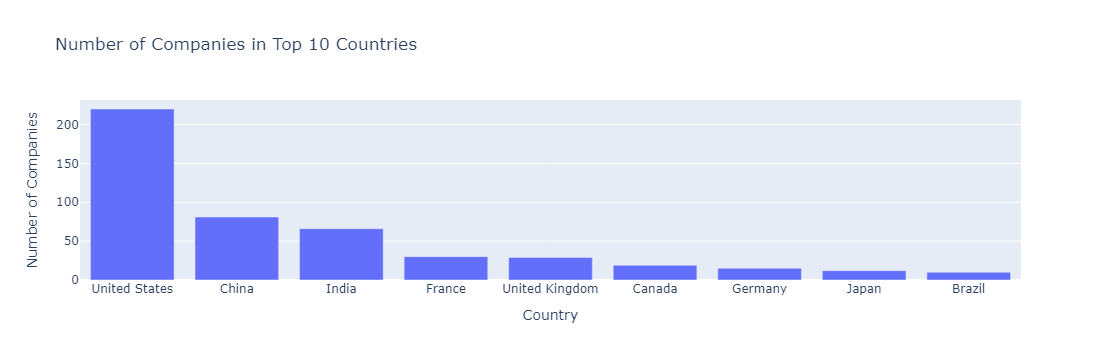

In [71]:

# Convert the 'Country' index to a column for easier plotting
count_reset = count.reset_index()

# Create the bar chart
fig = px.bar(count_reset, x='Country', y='Company',
             title='Number of Companies in Top 10 Countries',
             labels={'Country': 'Country', 'Company': 'Number of Companies'}
  ) 
# Show the plot
fig.show()

## Question 2: is there a relation between a large economy and being able to grow as a start up?

In [68]:
##count total unicorns 
count_all_countries = df_single_sub.groupby('Country').count().sort_values(by='Company', ascending=False)
print(count_all_countries)

                      Company  Industry
Country                                
United States             220       206
China                      81        47
India                      66        61
France                     30        29
United Kingdom             29        29
Israel                     20        20
Canada                     19        19
South Korea                18        16
Germany                    15        15
Japan                      12        11
Indonesia                  10        10
Brazil                     10        10
Sweden                      8         7
Mexico                      7         7
Singapore                   6         6
Hong Kong                   5         4
Turkey                      5         5
Australia                   5         5
United Arab Emirates        4         4
Belgium                     3         3
Philippines                 3         3
Spain                       2         2
United States[72]           2         2


In [ ]:
# Calculate the correlation between GDP and the number of unicorns
correlation = df_merged_ec['Company'].corr(df_unicorn_gdp['GDP'])
print(f'Correlation between GDP and Number of Unicorns: {correlation:.2f}')

# Industry

In [131]:
df_single.value_counts("Industry")

Industry
Financial technology       63
Software                   44
E-commerce                 29
Cybersecurity              20
Artificial intelligence    19
                           ..
Home improvement            1
Computer storage            1
Consumer electronics        1
Consumer finance            1
3D printing                 1
Name: count, Length: 155, dtype: int64

In [130]:
df_single.value_counts("Country")

Country
United States           220
China                    81
India                    66
France                   30
United Kingdom           29
Israel                   20
Canada                   19
South Korea              18
Germany                  15
Japan                    12
Indonesia                10
Brazil                   10
Sweden                    8
Mexico                    7
Singapore                 6
Hong Kong                 5
Turkey                    5
Australia                 5
United Arab Emirates      4
Belgium                   3
Philippines               3
Spain                     2
United States[72]         2
Norway                    2
Argentina                 2
Lithuania                 2
Denmark                   2
Bangladesh                2
Austria                   2
Malaysia                  1
Luxembourg                1
Nigeria                   1
Latvia                    1
Seychelles                1
Georgia                   1
Czech Republ